# AtlantOS transport arrays

Following http://www.oceansites.org/tma/index.html

In [646]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [647]:
import cmocean
import matplotlib.pyplot as plt

In [648]:
import numpy as np
import xarray as xr
import CM4Xutils
import tosnap
import sectionate as sec
import regionate as reg

In [649]:
path = "/work/hfd/codedev/CM4Xutils/data/coarsened/CM4Xp125_budgets_sigma2_2020-2024.zarr"
ds = xr.open_zarr(path)
grid = CM4Xutils.ds_to_grid(ds.fillna(0.))

Inferring Z grid coordinate: density `sigma2`


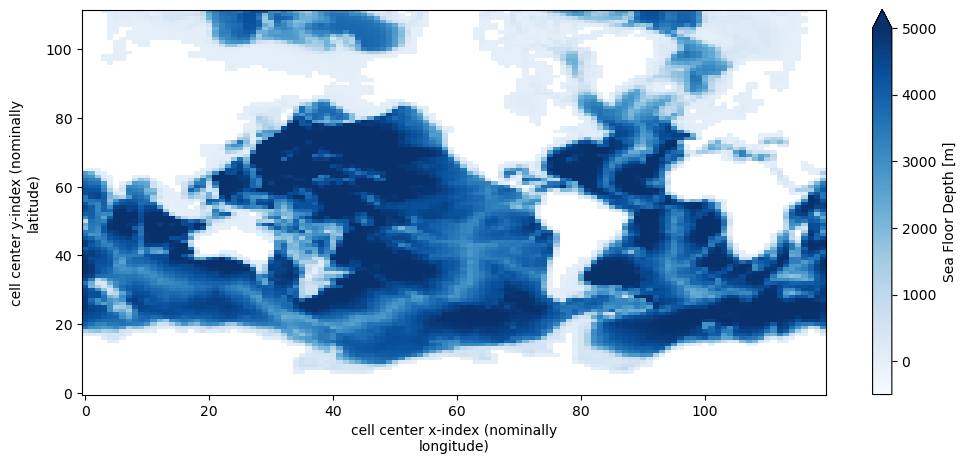

In [650]:
plt.figure(figsize=(12, 5))
grid._ds['deptho'].where(grid._ds['deptho']>0).plot(cmap="Blues", vmin=-500, vmax=5000)

In [651]:
sec1 = tosnap.atlantic_sections["Denmark Strait"]
sec2 = tosnap.atlantic_sections["Faroe Current"]
sec3 = tosnap.atlantic_sections["Faroe Bank"]

sec1, sec2, sec3

(Section(Denmark Strait, [(-44, 69), (-35, 69), (-25, 65), (-20, 65)]),
 Section(Faroe Current, [(-6.25, 62.25), (-14.0, 65.0)]),
 Section(Faroe Bank, [(-5.0, 56.75), (-3.0, 58.5), (-8.0, 61.0), (-6.25, 62.25)]))

In [652]:
section_test = sec.join_sections("Denmark Extended", sec1, sec2.reverse(), sec3)
section_test

Section(Denmark Extended, [(-44, 69), (-35, 69), (-25, 65), (-20, 65), (-14.0, 65.0), (-6.25, 62.25), (-6.25, 62.25), (-8.0, 61.0), (-3.0, 58.5), (-5.0, 56.75)])
 Children:
  - Section(Denmark Strait, [(-44, 69), (-35, 69), (-25, 65), (-20, 65)])
  - Section(Faroe Current, [(-14.0, 65.0), (-6.25, 62.25)])
  - Section(Faroe Bank, [(-6.25, 62.25), (-8.0, 61.0), (-3.0, 58.5), (-5.0, 56.75)])

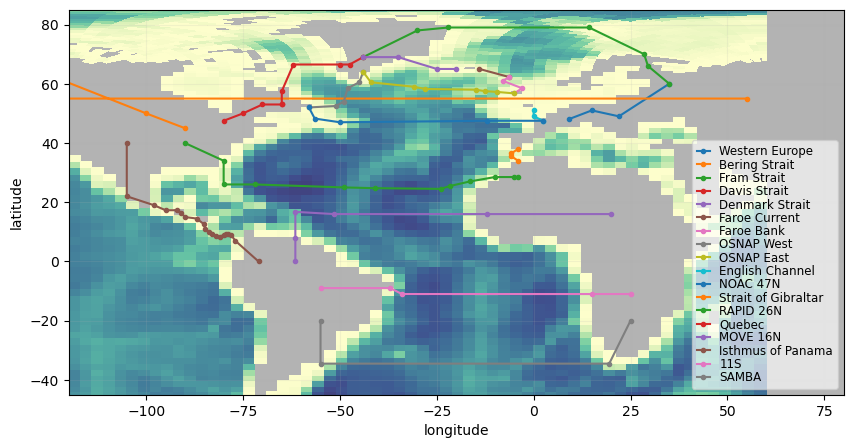

In [653]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.7, 0.7, 0.7))

plt.figure(figsize=(10, 5))

ax = plt.subplot(facecolor=(0.7, 0.7, 0.7))
plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'].where(grid._ds['deptho']>0),
    cmap=cmap, vmin=0, vmax=7500,
)
plt.xlim(-120, 80)
plt.ylim(-45, 85)

for sec_name, section in tosnap.atlantic_sections.items():
    lons, lats = section.lons, section.lats
    plt.plot(lons, lats, ".-", label=sec_name)
    
plt.legend(loc="lower right", handlelength=1.1, labelspacing=0.025, fontsize=8.5, framealpha=0.65)
plt.grid(True, alpha=0.15)
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.savefig("AtlantOS_arrays.png", bbox_inches="tight", dpi=200)

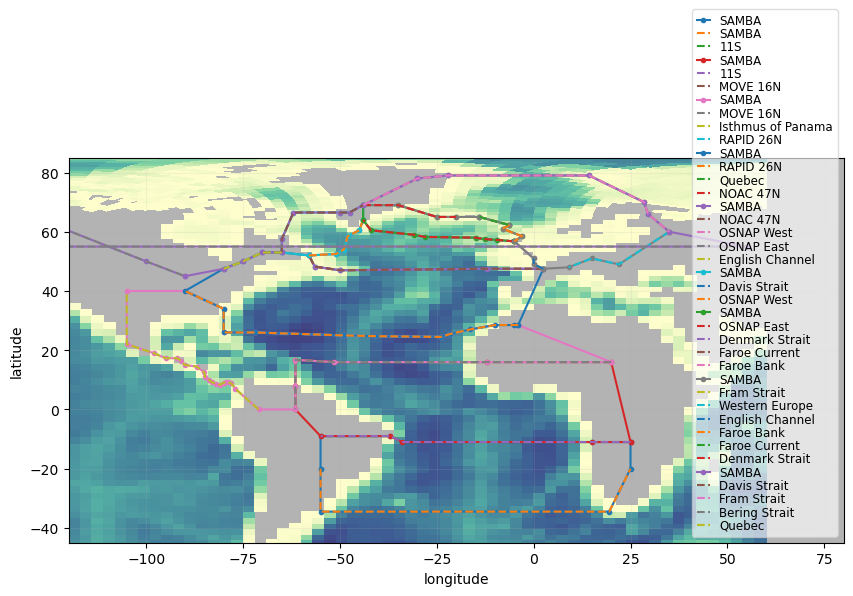

In [655]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.7, 0.7, 0.7))

plt.figure(figsize=(10, 5))

ax = plt.subplot(facecolor=(0.7, 0.7, 0.7))
plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'].where(grid._ds['deptho']>0),
    cmap=cmap, vmin=0, vmax=7500,
)
plt.xlim(-120, 80)
plt.ylim(-45, 85)

for section in tosnap.atlantic_region_boundaries:
    lons, lats = reg.loop(section.lons), reg.loop(section.lats)
    plt.plot(lons, lats, ".-", label=sec_name)
    for child_name, child in section.children.items():
        plt.plot(child.lons, child.lats, "--", label=child_name)
    
plt.legend(loc="lower right", handlelength=1.1, labelspacing=0.025, fontsize=8.5, framealpha=0.65)
plt.grid(True, alpha=0.15)
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.savefig("AtlantOS_arrays.png", bbox_inches="tight", dpi=200)

/vftmp/Henri.Drake/pid26408/ipykernel_16106/588340350.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(


(-50.0, 80.0)

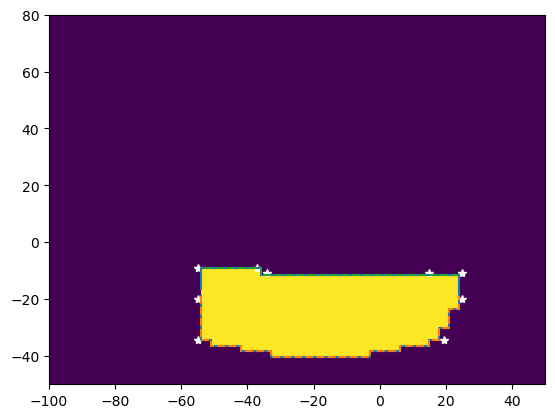

In [368]:
plt.pcolor(
    grid._ds.geolon,
    grid._ds.geolat,
    region.mask
)
plt.plot(section.lons, section.lats, "w*")
plt.plot(region.lons, region.lats)
for child_name, child in region.children.items():
    plt.plot(child.lons, child.lats, "--")
plt.xlim(-100, 50)
plt.ylim(-50, 80)

In [369]:
import gfdl_utils.core as gu
import doralite
import numpy as np

In [458]:
odiv = CM4Xutils.exp_dict["CM4Xp125"]["historical"]
pp = doralite.dora_metadata(odiv)["pathPP"]
ds = gu.open_static(pp, "ocean_annual")

/vftmp/Henri.Drake/pid26408/ipykernel_16106/2616979810.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(


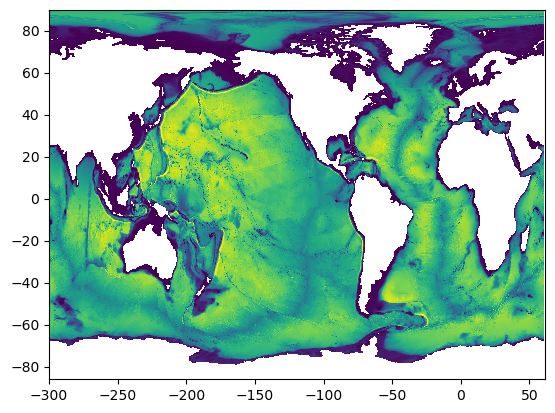

In [305]:
plt.pcolor(
    ds.geolon,
    ds.geolat,
    ds.deptho
)

In [480]:
tosnap, tosnap.section_coords

(<module 'tosnap' from '/work5/hfd/projects/tosnap/tosnap/__init__.py'>,
 {'Fram Strait': Section(Fram Strait, [(-22.0, 79.0), (14.25, 79.0)]),
  'Davis Strait': Section(Davis Strait, [(-65.0, 57.5), (-62.0, 66.5), (-50.0, 66.5)]),
  'Denmark Strait': Section(Denmark Strait, [(-35, 69), (-25, 65), (-20, 65)]),
  'Faroe Current': Section(Faroe Current, [(-14.0, 65.0), (-6.25, 62.25)]),
  'Faroe Bank': Section(Faroe Bank, [(-6.25, 62.25), (-8.0, 61.0), (-3.0, 58.5)]),
  'OSNAP West': Section(OSNAP West, [(-58, 52), (-51, 52.5), (-49, 54), (-48, 58.5), (-44, 60.5)]),
  'OSNAP East': Section(OSNAP East, [(-44, 60.5), (-31, 59.0), (-28.0, 58.25), (-15, 58.0), (-12.5, 57.5), (-9.5, 57.25), (-5.0, 56.75)]),
  'English Channel': Section(English Channel, [(0.0, 51.0), (0.0, 49.0)]),
  'NOAC 47N': Section(NOAC 47N, [(-58.0, 52.0), (-56.5, 48.25), (-50.0, 47.0), (-12.0, 47.5), (2.5, 47.5)]),
  'Strait of Gibraltar': Section(Strait of Gibraltar, [(-4.0, 38.0), (-5.75, 36.5), (-5.75, 35.5), (-4.0, 

(30.0, 65.0)

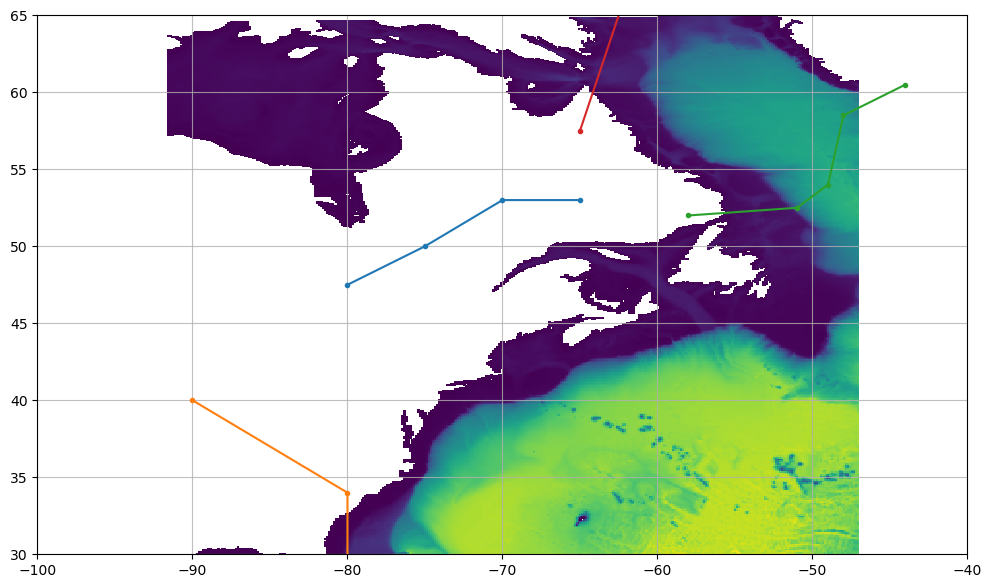

In [481]:
plt.figure(figsize=(12, 7))
ds_zoom = ds.sel(xh=slice(-90, -40), yh=slice(30, 65))
plt.pcolor(
    ds_zoom.geolon,
    ds_zoom.geolat,
    ds_zoom.deptho
)
plt.grid(True, alpha=0.8)

section = tosnap.section_coords["Quebec"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["RAPID 26N"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["OSNAP West"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["Davis Strait"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")
plt.xlim(-100, -40)
plt.ylim(30, 65)

(0.0, 25.0)

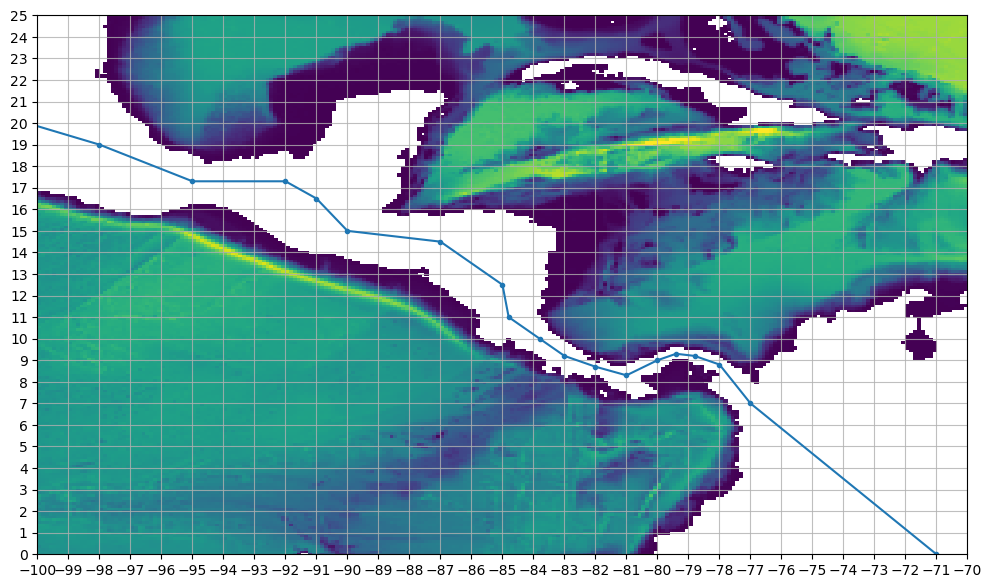

In [459]:
plt.figure(figsize=(12, 7))
ds_zoom = ds.sel(xh=slice(-130, -60), yh=slice(-5, 40))
plt.pcolor(
    ds_zoom.geolon,
    ds_zoom.geolat,
    ds_zoom.deptho
)
plt.xticks(np.arange(-125, -65, 1))
plt.yticks(np.arange(-5, 45, 1))
plt.grid(True, alpha=0.8)

section = tosnap.section_coords["Isthmus of Panama"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

plt.xlim(-100, -70)
plt.ylim(0, 25)